In [46]:
import matplotlib.pyplot as plt
import matplotlib 
def plot_accuracy(epochs, train_accuracies, val_accuracies):
    epochs = np.arange(5) + 1
    plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
    plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
    from matplotlib import ticker
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
    plt.title('''Training and validation accuracy with VGG16 and 1K training data points''')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(0.95, 1)  
    plt.gca().set_yticklabels(['{:.0f}%'.format(x*100)
                               for x in plt.gca().get_yticks()])
    plt.legend()
    plt.grid('off')
    plt.show()

/tmp/ipykernel_14371/912932216.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100)


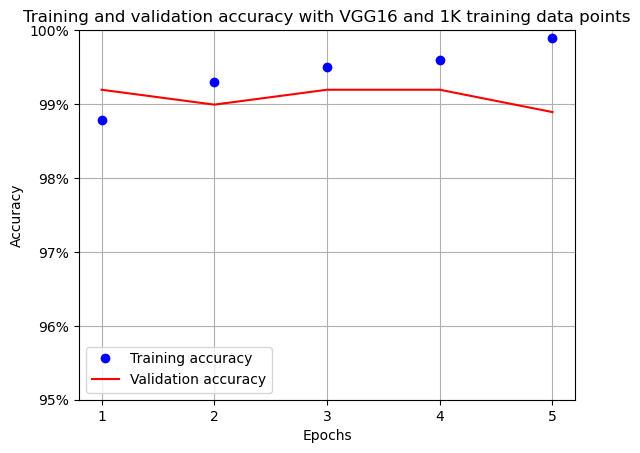

In [47]:
data = np.load('data.npz')
plot_accuracy(5, data['train_accuracies'], data['val_accuracies'])